In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Air and Weather Data.xlsx")
df

,SO2,NOx,RSPM,Weather,Temp Max (˚C),Temp Min (˚C),Wind (km/h),Wind direction,Rain (mm),Humidity,Cloud,Pressure (mb),AQI
0,34,69,213,Sunny,32,18,5,SE,0.0,0.43,0.04,1014,175
1,18,66,228,Sunny,32,18,5,SE,0.0,0.43,0.04,1014,185
2,15,42,171,Sunny,32,18,4,SSE,0.0,0.47,0.04,1015,147
3,10,39,206,Patchy rain possible,28,21,5,S,0.4,0.54,0.23,1016,171
4,24,45,138,Partly cloudy,32,22,4,S,0.0,0.45,0.26,1015,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,64,77,98,Sunny,29,19,8,WNW,0.0,0.44,0.08,1014,98
2723,53,70,113,Sunny,27,16,8,ENE,0.0,0.30,0.00,1014,109
2724,49,75,126,Sunny,26,13,11,E,0.0,0.28,0.00,1014,117
2725,52,76,161,Sunny,28,14,8,E,0.0,0.30,0.00,1016,141


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2727 entries, 0 to 2726
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SO2             2727 non-null   int64  
 1   NOx             2727 non-null   int64  
 2   RSPM            2727 non-null   int64  
 3   Weather         2727 non-null   object 
 4   Temp Max  (˚C)  2727 non-null   int64  
 5   Temp Min (˚C)   2727 non-null   int64  
 6   Wind (km/h)     2727 non-null   int64  
 7   Wind direction  2727 non-null   object 
 8   Rain (mm)       2727 non-null   float64
 9   Humidity        2727 non-null   float64
 10  Cloud           2727 non-null   float64
 11  Pressure (mb)   2727 non-null   int64  
 12  AQI             2727 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 277.1+ KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,SO2,NOx,RSPM,Temp Max (˚C),Temp Min (˚C),Wind (km/h),Rain (mm),Humidity,Cloud,Pressure (mb),AQI
count,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000
mean,26.678768,51.730840,91.932160,31.525853,20.905024,8.759809,4.721195,0.582065,0.298860,1009.666667,92.509718
std,13.275629,27.017483,55.287697,4.786411,2.655191,3.858734,12.927130,0.226578,0.323212,3.437525,43.634830
min,6.000000,9.000000,6.000000,22.000000,11.000000,2.000000,0.000000,0.100000,0.000000,999.000000,20.000000
25%,17.000000,33.000000,46.000000,28.000000,19.000000,6.000000,0.000000,0.385000,0.030000,1007.000000,56.500000
50%,23.000000,46.000000,81.000000,31.000000,21.000000,8.000000,0.000000,0.540000,0.120000,1010.000000,88.000000
75%,33.000000,64.000000,129.000000,35.000000,23.000000,11.000000,4.200000,0.810000,0.610000,1012.000000,123.000000
max,102.000000,331.000000,386.000000,44.000000,29.000000,27.000000,244.700000,0.990000,1.000000,1019.000000,345.000000


In [6]:
num_col  =df.describe().columns.tolist()
num_col

['SO2',
 'NOx',
 'RSPM',
 'Temp Max  (˚C)',
 'Temp Min (˚C)',
 'Wind (km/h)',
 'Rain (mm)',
 'Humidity',
 'Cloud',
 'Pressure (mb)',
 'AQI']

In [7]:
cat_col = [i for i in df.columns if i not in num_col]
cat_col

['Weather', 'Wind direction']

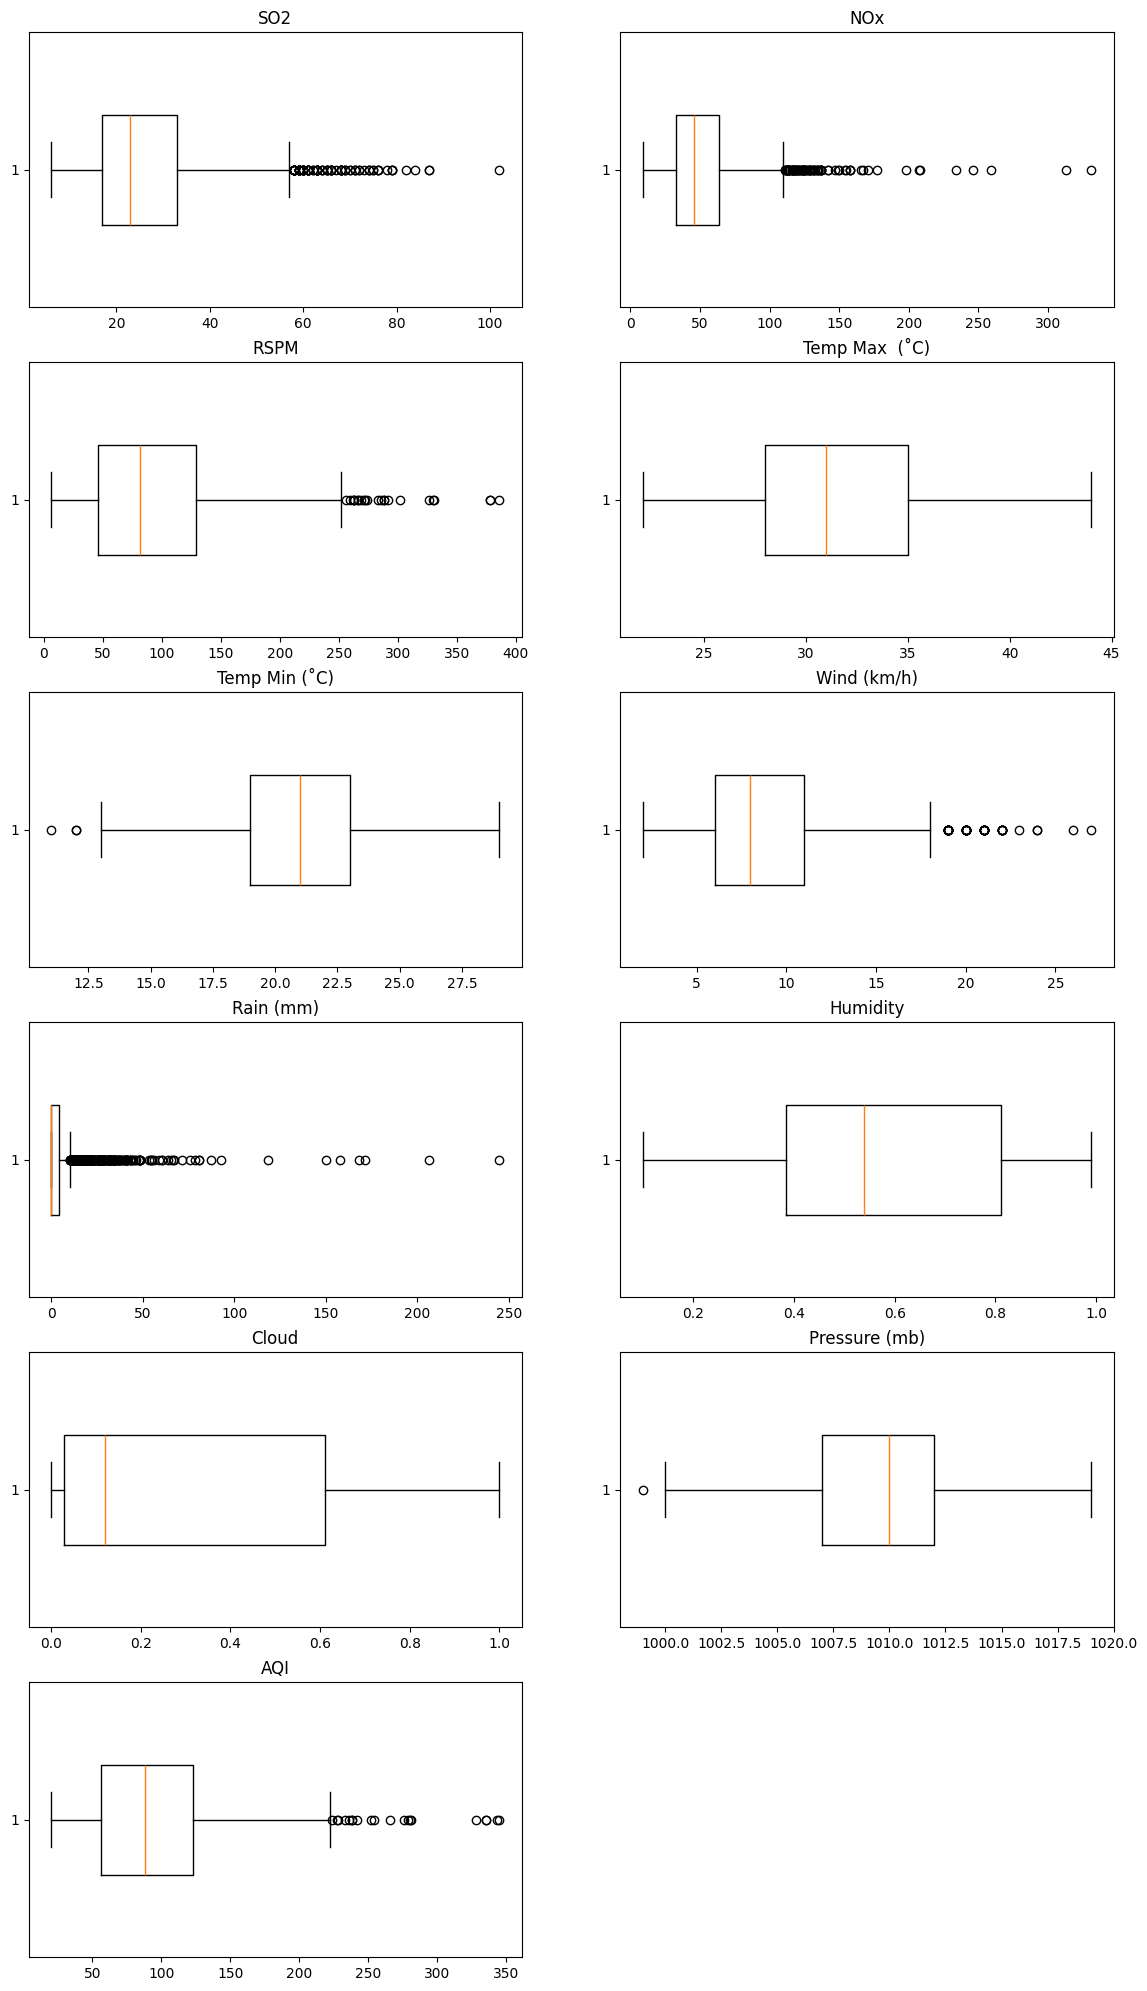

In [8]:
plt.figure(figsize=(14, 25))
for i in range(0, 11):
    plt.subplot(6, 2, i+1)
    plt.boxplot(df[num_col[i]], vert=False, widths=0.4)
    plt.title(num_col[i])
plt.show()

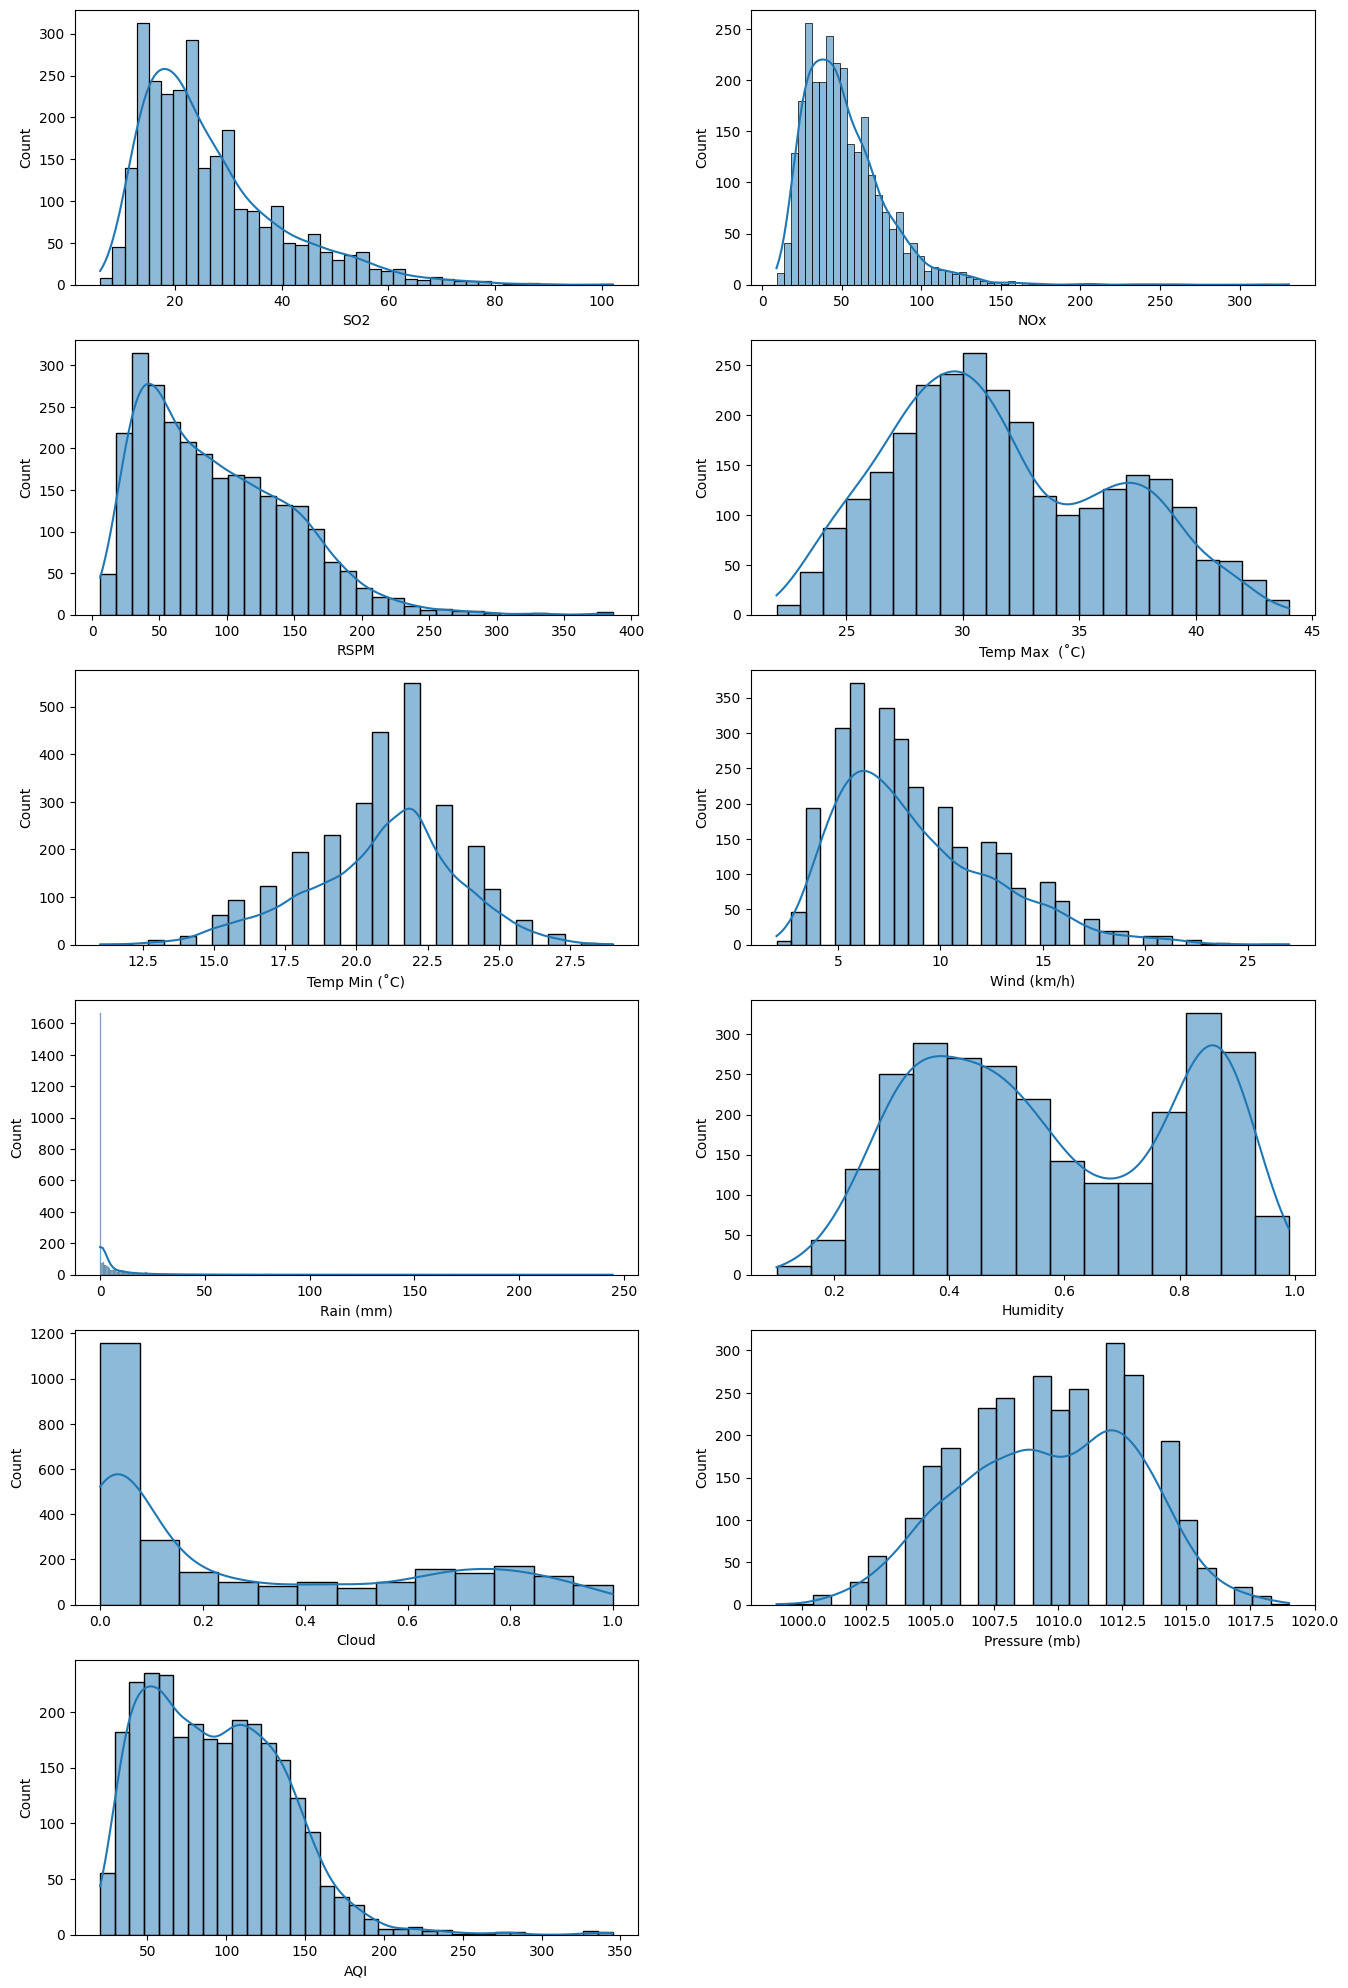

In [9]:
plt.figure(figsize=(16, 25))
for i in range(0, 11):
    plt.subplot(6, 2, i+1)
    sns.histplot(df[num_col[i]], kde=True)
    
plt.show()

In [10]:
def replace_outliers(col):
    mean = col.mean()
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    res = col.apply(lambda x : x if x > lower and x < upper else mean)
    return res

In [11]:
df["SO2"] = replace_outliers(df["SO2"])

In [12]:
df["NOx"] = replace_outliers(df["NOx"])

In [13]:
df["RSPM"] = replace_outliers(df["RSPM"])

In [14]:
df["Wind (km/h)"] = replace_outliers(df["Wind (km/h)"])

In [15]:
df["Rain (mm)"] = replace_outliers(df["Rain (mm)"])

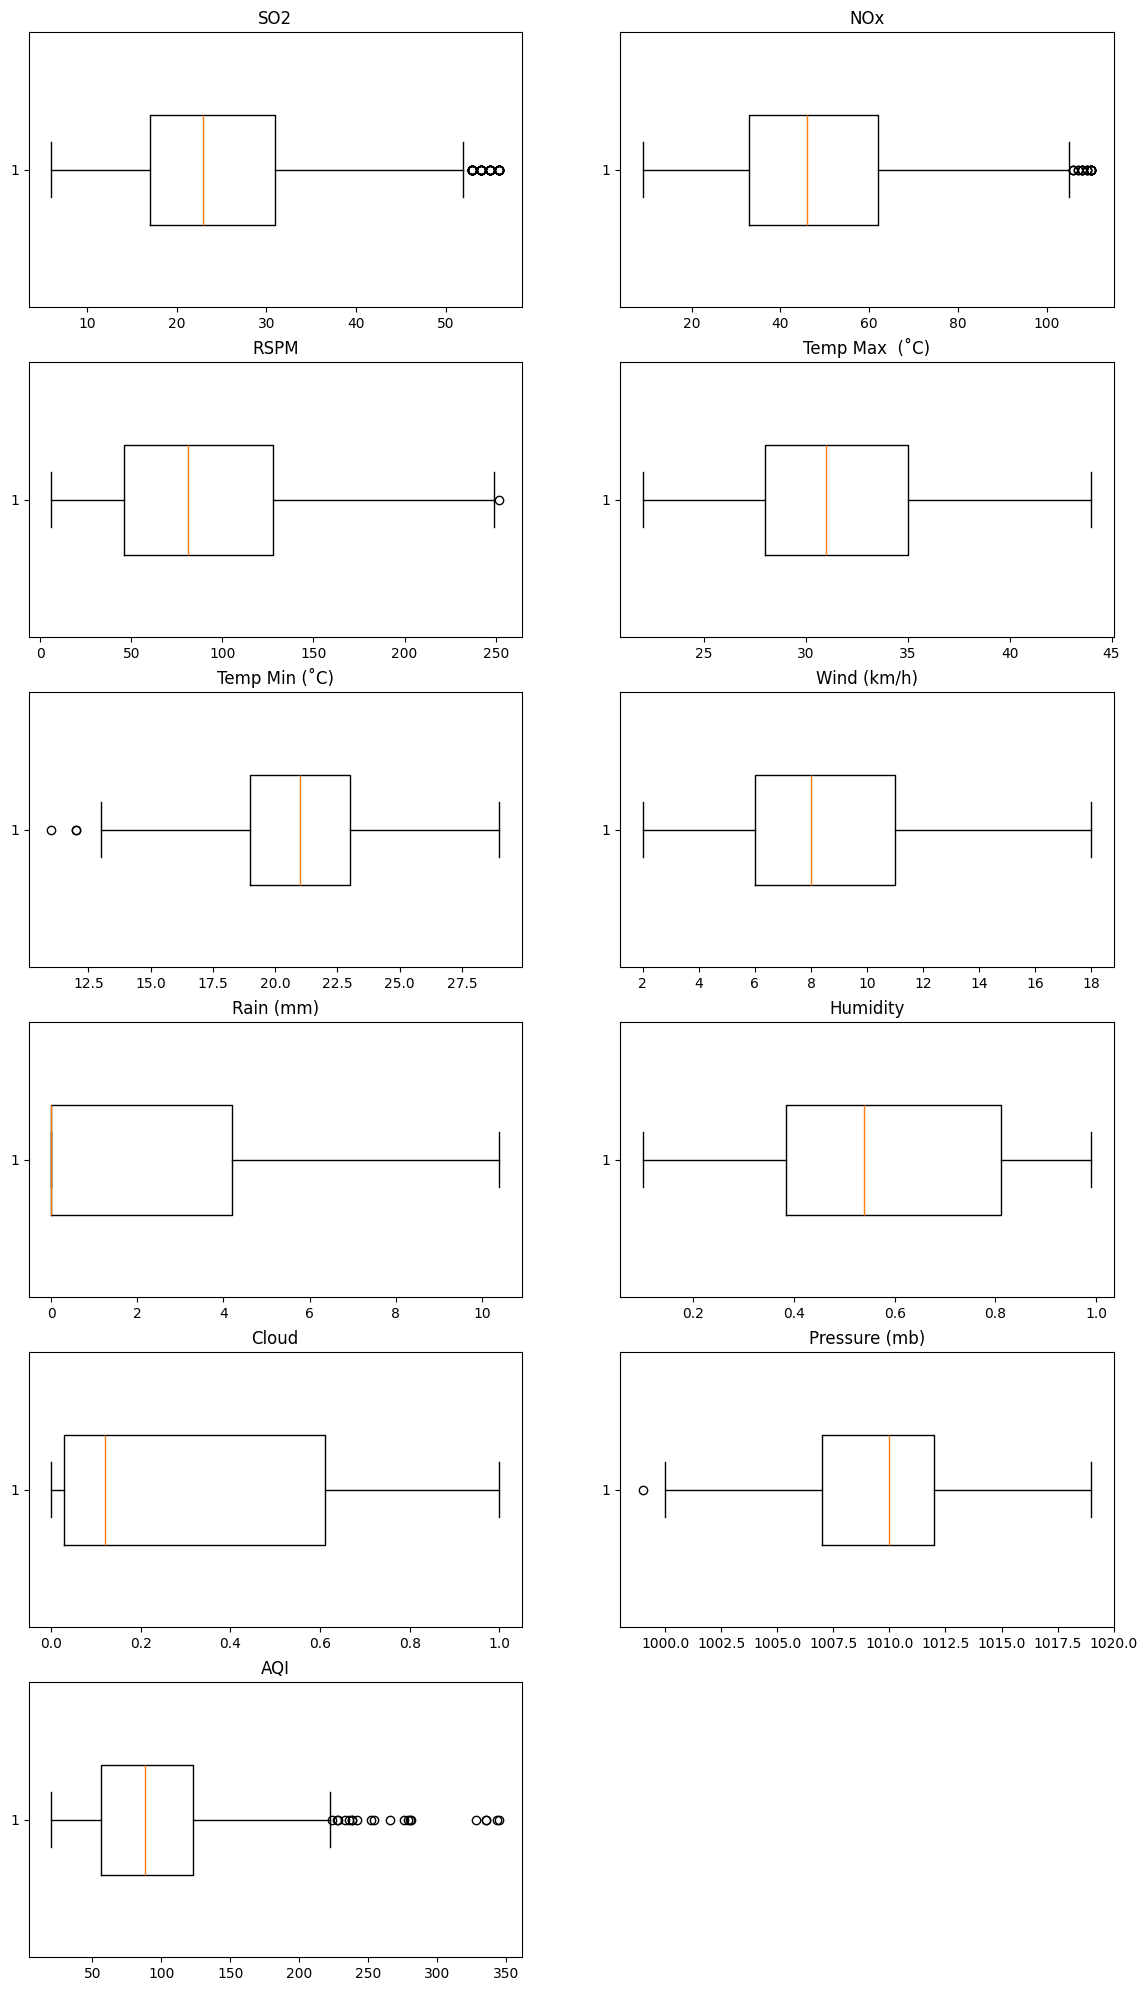

In [16]:
plt.figure(figsize=(14, 25))
for i in range(0, 11):
    plt.subplot(6, 2, i+1)
    plt.boxplot(df[num_col[i]], vert=False, widths=0.4)
    plt.title(num_col[i])
plt.show()

In [17]:
new_df  = df.copy()

In [18]:
df["Weather"] = df["Weather"].str.replace(" at times" , "")

In [19]:
df["Weather"] = df["Weather"].str.replace(" shower" , "")

In [20]:
df["Weather"] = df["Weather"].str.replace(" with thunder" , "")

In [21]:
df["Weather"] = df["Weather"].str.replace("Patchy " , "")

In [22]:
df["Weather"] = df["Weather"].str.replace("drizzle" , "rain")

In [23]:
df["Weather"] = df["Weather"].str.replace("or heavy " , "")

In [24]:
df["Weather"] = df["Weather"].str.replace("rain possible" , "Cloudy")

In [25]:
df["Weather"] = df["Weather"].str.replace("Partly cloudy" , "Cloudy")

In [26]:
df["Weather"] = df["Weather"].str.replace("Torrential" , "Light")

In [27]:
df["Weather"] = df["Weather"].str.replace("light " , "Light ")

In [28]:
df["Weather"].value_counts()

Weather
Sunny            1416
Moderate rain     586
Cloudy            383
Light rain        237
Heavy rain         96
Overcast            9
Name: count, dtype: int64

In [29]:
df["Wind direction"] = df["Wind direction"].apply(lambda x : x[0])

In [30]:
df["Wind direction"].value_counts()

Wind direction
W    1358
S     672
E     606
N      91
Name: count, dtype: int64

In [31]:
ohe = OneHotEncoder(drop = "first")

In [32]:
encoded = ohe.fit_transform(df[cat_col])

In [33]:
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4465 stored elements and shape (2727, 8)>

In [34]:
df = pd.concat([df,
           pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out())],
          axis=1).drop(cat_col, axis=1)

In [35]:
df

,SO2,NOx,RSPM,Temp Max (˚C),Temp Min (˚C),Wind (km/h),Rain (mm),Humidity,Cloud,Pressure (mb),AQI,Weather_Heavy rain,Weather_Light rain,Weather_Moderate rain,Weather_Overcast,Weather_Sunny,Wind direction_N,Wind direction_S,Wind direction_W
0,34.000000,69.0,213.0,32,18,5.0,0.0,0.43,0.04,1014,175,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,18.000000,66.0,228.0,32,18,5.0,0.0,0.43,0.04,1014,185,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,15.000000,42.0,171.0,32,18,4.0,0.0,0.47,0.04,1015,147,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,10.000000,39.0,206.0,28,21,5.0,0.4,0.54,0.23,1016,171,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24.000000,45.0,138.0,32,22,4.0,0.0,0.45,0.26,1015,125,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,26.678768,77.0,98.0,29,19,8.0,0.0,0.44,0.08,1014,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2723,53.000000,70.0,113.0,27,16,8.0,0.0,0.30,0.00,1014,109,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2724,49.000000,75.0,126.0,26,13,11.0,0.0,0.28,0.00,1014,117,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2725,52.000000,76.0,161.0,28,14,8.0,0.0,0.30,0.00,1016,141,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
scaler = StandardScaler()

In [37]:
df[num_col[:-1]] = scaler.fit_transform(df[num_col[:-1]])

In [38]:
df

,SO2,NOx,RSPM,Temp Max (˚C),Temp Min (˚C),Wind (km/h),Rain (mm),Humidity,Cloud,Pressure (mb),AQI,Weather_Heavy rain,Weather_Light rain,Weather_Moderate rain,Weather_Overcast,Weather_Sunny,Wind direction_N,Wind direction_S,Wind direction_W
0,0.813615,0.984550,2.366820,0.099079,-1.094293,-1.020522,-0.685235,-0.671260,-0.801043,1.260828,175,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.672693,0.837833,2.655969,0.099079,-1.094293,-1.020522,-0.685235,-0.671260,-0.801043,1.260828,185,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.951376,-0.335902,1.557203,0.099079,-1.094293,-1.311010,-0.685235,-0.494687,-0.801043,1.551788,147,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.415848,-0.482619,2.231884,-0.736773,0.035777,-1.020522,-0.528606,-0.185686,-0.213086,1.842749,171,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.115328,-0.189185,0.921075,0.099079,0.412466,-1.311010,-0.685235,-0.582973,-0.120251,1.551788,125,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,0.133514,1.375795,0.150011,-0.527810,-0.717603,-0.149058,-0.685235,-0.627116,-0.677262,1.260828,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2723,2.578606,1.033456,0.439160,-0.945736,-1.847673,-0.149058,-0.685235,-1.245119,-0.924823,1.260828,109,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2724,2.207029,1.277984,0.689756,-1.154699,-2.977742,0.722405,-0.685235,-1.333406,-0.924823,1.260828,117,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2725,2.485712,1.326889,1.364437,-0.736773,-2.601053,-0.149058,-0.685235,-1.245119,-0.924823,1.842749,141,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
df.columns

Index(['SO2', 'NOx', 'RSPM', 'Temp Max  (˚C)', 'Temp Min (˚C)', 'Wind (km/h)',
       'Rain (mm)', 'Humidity', 'Cloud', 'Pressure (mb)', 'AQI',
       'Weather_Heavy rain', 'Weather_Light rain', 'Weather_Moderate rain',
       'Weather_Overcast', 'Weather_Sunny', 'Wind direction_N',
       'Wind direction_S', 'Wind direction_W'],
      dtype='object')

In [40]:
df = df[['SO2', 'NOx', 'RSPM', 'Temp Max  (˚C)', 'Temp Min (˚C)', 'Wind (km/h)',
       'Rain (mm)', 'Humidity', 'Cloud', 'Pressure (mb)',
       'Weather_Heavy rain', 'Weather_Light rain', 'Weather_Moderate rain',
       'Weather_Overcast', 'Weather_Sunny', 'Wind direction_N',
       'Wind direction_S', 'Wind direction_W', 'AQI']]

In [41]:
df

,SO2,NOx,RSPM,Temp Max (˚C),Temp Min (˚C),Wind (km/h),Rain (mm),Humidity,Cloud,Pressure (mb),Weather_Heavy rain,Weather_Light rain,Weather_Moderate rain,Weather_Overcast,Weather_Sunny,Wind direction_N,Wind direction_S,Wind direction_W,AQI
0,0.813615,0.984550,2.366820,0.099079,-1.094293,-1.020522,-0.685235,-0.671260,-0.801043,1.260828,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,175
1,-0.672693,0.837833,2.655969,0.099079,-1.094293,-1.020522,-0.685235,-0.671260,-0.801043,1.260828,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,185
2,-0.951376,-0.335902,1.557203,0.099079,-1.094293,-1.311010,-0.685235,-0.494687,-0.801043,1.551788,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,147
3,-1.415848,-0.482619,2.231884,-0.736773,0.035777,-1.020522,-0.528606,-0.185686,-0.213086,1.842749,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,171
4,-0.115328,-0.189185,0.921075,0.099079,0.412466,-1.311010,-0.685235,-0.582973,-0.120251,1.551788,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,0.133514,1.375795,0.150011,-0.527810,-0.717603,-0.149058,-0.685235,-0.627116,-0.677262,1.260828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,98
2723,2.578606,1.033456,0.439160,-0.945736,-1.847673,-0.149058,-0.685235,-1.245119,-0.924823,1.260828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,109
2724,2.207029,1.277984,0.689756,-1.154699,-2.977742,0.722405,-0.685235,-1.333406,-0.924823,1.260828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,117
2725,2.485712,1.326889,1.364437,-0.736773,-2.601053,-0.149058,-0.685235,-1.245119,-0.924823,1.842749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141


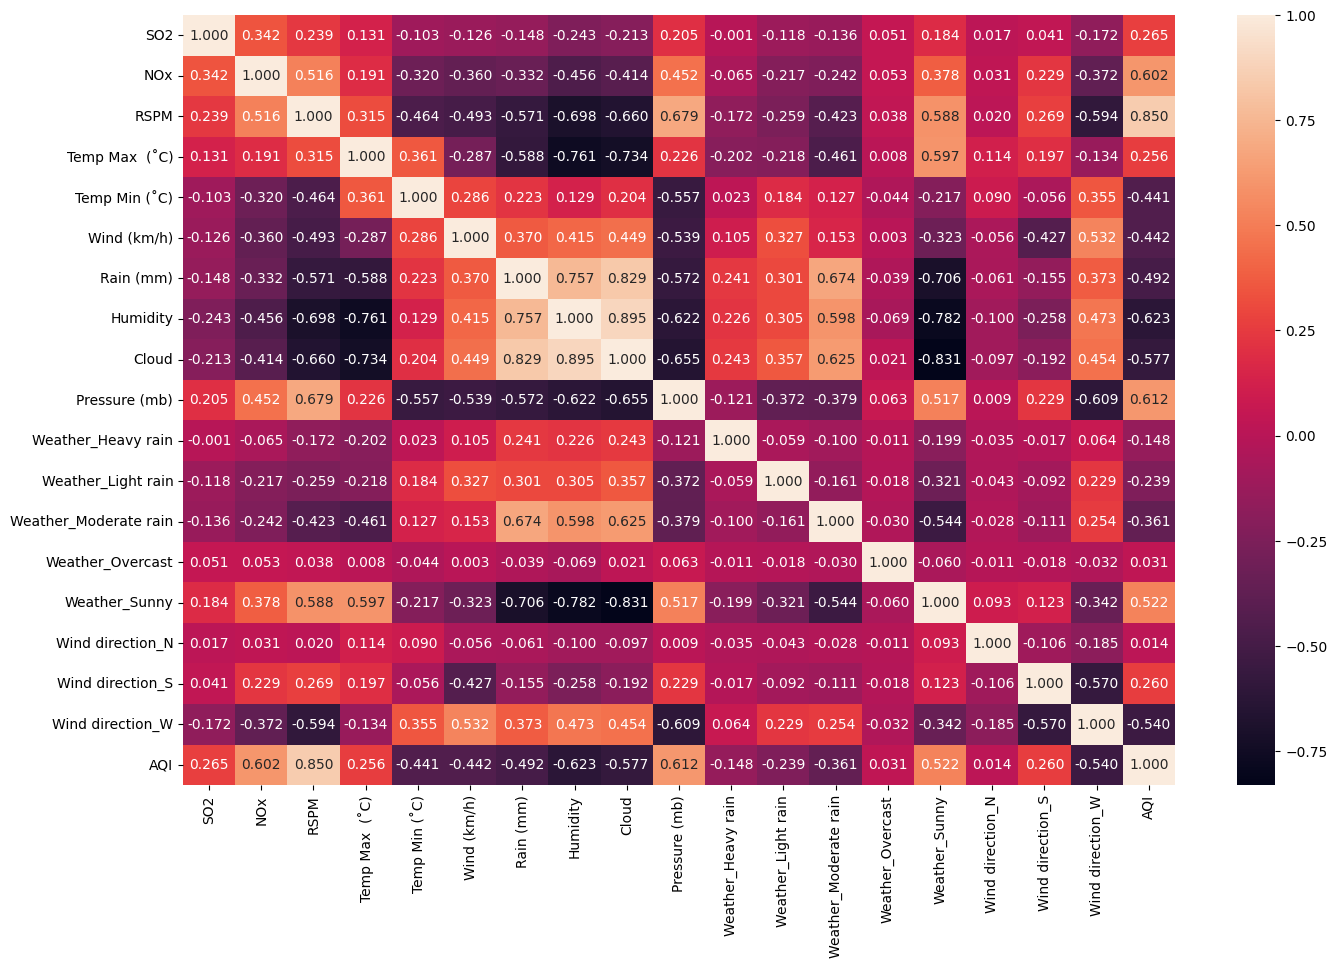

In [42]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, fmt = ".3f")
plt.show()

In [43]:
X = df.drop("AQI" , axis = 1)
y = df["AQI"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=34)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.score(X_train, y_train)

0.7497410176272592

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred

array([ 45.84262891,  47.55004033,  41.24757234,  40.92798882,
        54.76226697, 113.30430899,  94.62905833, 148.17113294,
       171.33713581,  59.43145115, 116.73904691,  88.62512844,
        86.71434518, 119.98402241,  97.11640032, 116.06152718,
        39.49523739,  98.05507254, 117.8438045 , 115.28395443,
        89.42347407,  43.57043608, 145.70342743, 134.57617805,
        50.80562922,  51.19125003,  49.88536095,  53.04754432,
       174.80938488,  76.76723973,  86.66110538,  55.04446797,
        46.23155274,  69.25106941, 162.59804805,  85.67179601,
       108.41735947, 163.19169447,  87.97790239,  80.25234262,
        41.75096603,  64.47489948,  70.61961821, 100.74019286,
        98.23041607,  60.89007804,  69.57990984, 139.61684137,
       126.52119646,  78.08439516,  68.76028853,  54.8835899 ,
        69.00963301,  36.07048846,  51.36068566, 139.06515473,
        58.95230163,  63.70498594, 146.61009549,  77.60137788,
        58.04680425, 126.52219059,  53.6098787 , 142.42

In [50]:
mean_squared_error(y_test, y_pred)

383.3020882032761

In [51]:
root_mean_squared_error(y_test, y_pred)

19.57810226256049

In [52]:
mean_absolute_error(y_test, y_pred)

10.286293427012787

In [53]:
r2 = r2_score(y_test, y_pred)

In [54]:
r2

0.7966252169147139

In [55]:
rows, columns = X_test.shape

In [56]:
adj_r2 = 1 - (((1 - r2)*(rows - 1)) / (rows - columns - 1))

In [57]:
adj_r2

0.7911037295911315

In [58]:
replace_outliers(df["AQI"]).max()

np.float64(222.0)

In [59]:
df["AQI"] = replace_outliers(df["AQI"])

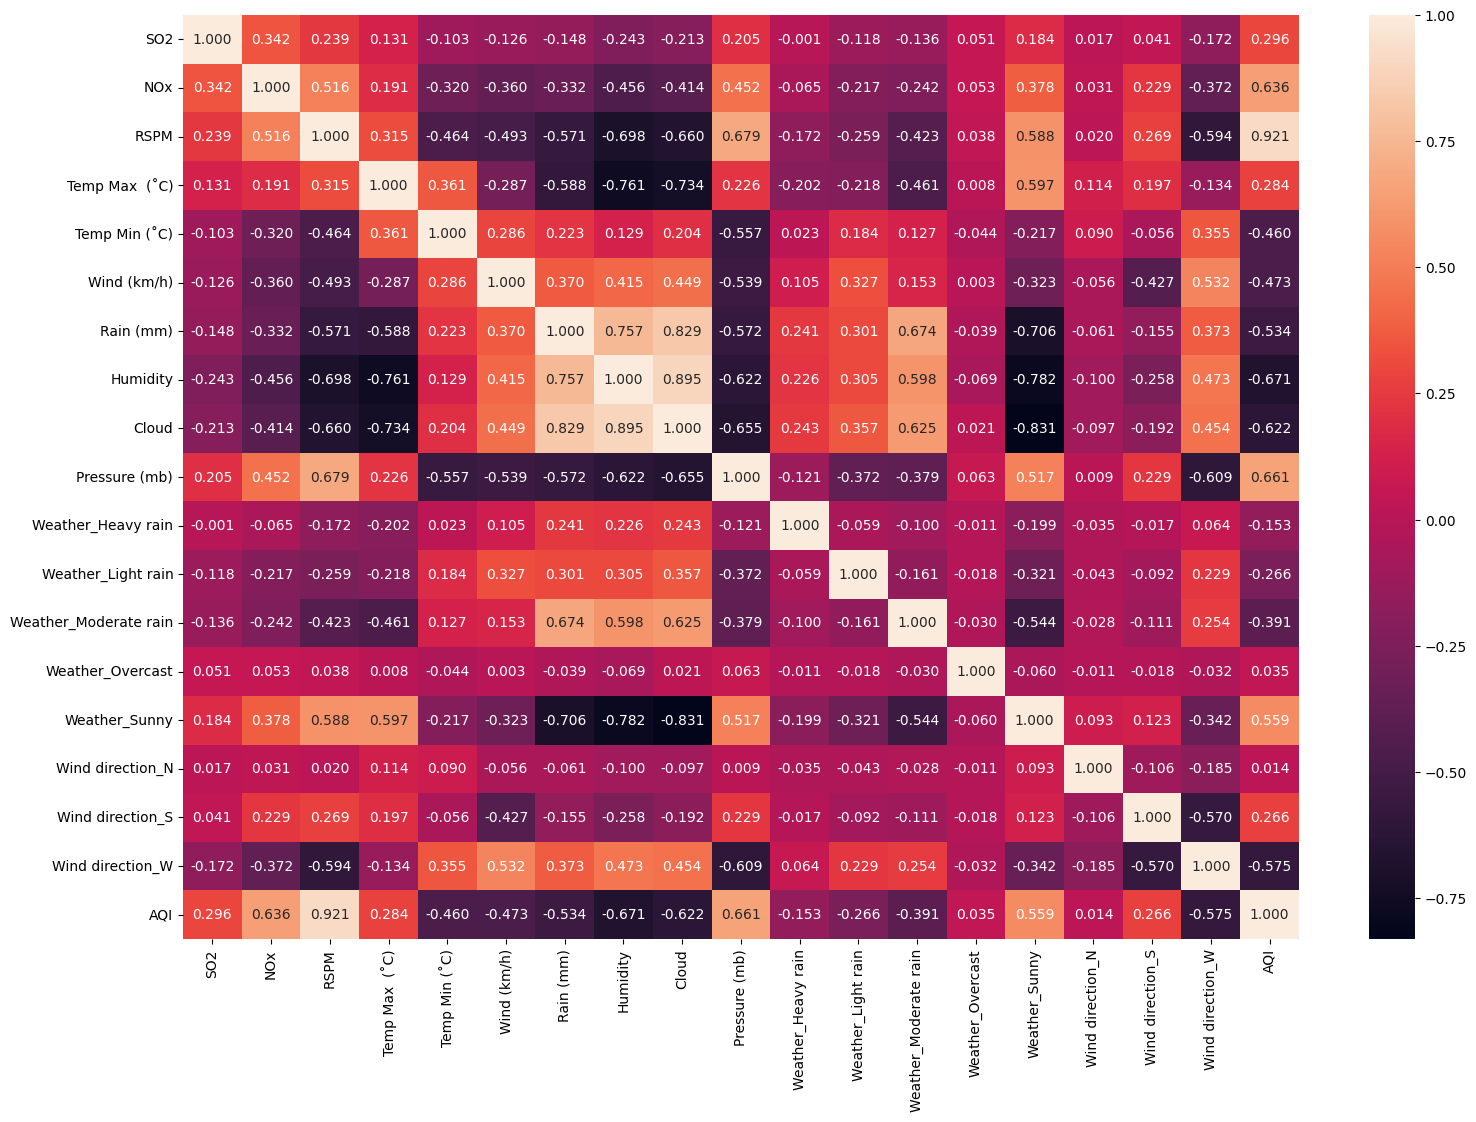

In [60]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, fmt = ".3f")
plt.show()

In [61]:
df.drop(["Weather_Heavy rain" , "Weather_Overcast" , "Wind direction_N"], axis=1, inplace=True)

In [62]:
min_max = MinMaxScaler()

In [63]:
df["AQI"] = min_max.fit_transform(df[["AQI"]])

In [64]:
df.head()

,SO2,NOx,RSPM,Temp Max (˚C),Temp Min (˚C),Wind (km/h),Rain (mm),Humidity,Cloud,Pressure (mb),Weather_Light rain,Weather_Moderate rain,Weather_Sunny,Wind direction_S,Wind direction_W,AQI
0,0.813615,0.984550,2.366820,0.099079,-1.094293,-1.020522,-0.685235,-0.671260,-0.801043,1.260828,0.0,0.0,1.0,1.0,0.0,0.767327
1,-0.672693,0.837833,2.655969,0.099079,-1.094293,-1.020522,-0.685235,-0.671260,-0.801043,1.260828,0.0,0.0,1.0,1.0,0.0,0.816832
2,-0.951376,-0.335902,1.557203,0.099079,-1.094293,-1.311010,-0.685235,-0.494687,-0.801043,1.551788,0.0,0.0,1.0,1.0,0.0,0.628713
3,-1.415848,-0.482619,2.231884,-0.736773,0.035777,-1.020522,-0.528606,-0.185686,-0.213086,1.842749,0.0,0.0,0.0,1.0,0.0,0.747525
4,-0.115328,-0.189185,0.921075,0.099079,0.412466,-1.311010,-0.685235,-0.582973,-0.120251,1.551788,0.0,0.0,0.0,1.0,0.0,0.519802


In [65]:
X = df.drop("AQI" , axis = 1)
y = df["AQI"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=34)

In [67]:
model2 = LinearRegression()

In [68]:
model2.fit(X_train, y_train)

LinearRegression()

In [69]:
model2.score(X_train, y_train) # Training score or training accuracy

0.899689973225627

In [70]:
y_pred2 = model2.predict(X_test)

In [71]:
original_outputs = min_max.inverse_transform([y_pred2])

In [72]:
original_y_test = min_max.inverse_transform([y_test])

In [73]:
mae = mean_absolute_error(original_y_test, original_outputs)
mse = mean_squared_error(original_y_test, original_outputs)
rmse = root_mean_squared_error(original_y_test, original_outputs)
mae, mse, rmse

(8.944007918223258, 273.6675943883112, 8.944007918223258)

In [74]:
r2 = r2_score(y_test, y_pred2)
r2

0.8450864818398208

In [75]:
adj_r2 = 1 - (((1 - r2)*(rows - 1)) / (rows - columns - 1))
adj_r2

0.8408806849666938